$\Large\color{red}{\text{Announce: ebook "PyGMTSAR: Sentinel-1 Python InSAR: An Introduction"}}$
$\Large\color{red}{\text{is now available on Amazon, Apple, Kobo and many other bookstores.}}$

$\Large\color{blue}{\text{PyGMTSAR Co-Seismic Interferogram 2023-02-06}}$
$\Large\color{blue}{\text{CENTRAL Türkiye Mw 7.8 & 7.5 Earthquakes}}$
$\Large\color{blue}{\text{Sentinel-1 Scenes Downloading from Alaska Satellite Facility (ASF)}}$

See https://www.emsc-csem.org/Earthquake/earthquake.php?id=1218444 and https://www.emsc-csem.org/Earthquake/earthquake.php?id=1218771

### Look for more PyGMTSAR examples:

* Google Colab - see GitHub page for [notebooks](https://github.com/mobigroup/gmtsar),

* Docker Images on [DockerHub](https://hub.docker.com/r/mobigroup/pygmtsar),

* GitHub [notebooks](https://github.com/mobigroup/gmtsar/tree/master/notebooks),

* GitHub Actions [console scripts](https://github.com/mobigroup/gmtsar/actions),

* Google Cloud VM -  follow [PyGMTSAR documentation](https://mobigroup.github.io/gmtsar/),

* Linux Debian and Ubuntu -  follow [PyGMTSAR documentation](https://mobigroup.github.io/gmtsar/),

* Apple Silicon and Intel hosts -  follow [PyGMTSAR documentation](https://mobigroup.github.io/gmtsar/).


### PyGMTSAR InSAR library, Geomed3D Geophysical Inversion Library, N-Cube 3D/4D GIS Data Visualization, etc. are my free-time Open Source projects.

I have STEM master’s degree in radio physics and in 2004 I have got the first prize of the All-Russian Physics competition for significant results in forward and inverse modeling for non-linear optics and holography, also applicable for modeling of Gravity, Magnetic, and Thermal fields and satellite interferometry processing. And I’m data scientist and software developer with 20 year’s experience in science and industrial development. I had been working on government contracts and universities projects and on projects for LG Corp, Google Inc, etc.

### You can sponsor my work on [Patreon](https://www.patreon.com/pechnikov) where I share my projects updates, publications, use cases, examples, and other useful information. To order some research and development and support, see my profile on freelance platform [Upwork](https://www.upwork.com/freelancers/~01e65e8e7221758623).

### Resources

* [Patreon](https://www.patreon.com/pechnikov),

* [YouTube Geological Models](https://www.youtube.com/channel/UCSEeXKAn9f_bDiTjT6l87Lg),

* [Virtual and Augmented Reality (VR/AR) Geological Models](https://mobigroup.github.io/ParaView-Blender-AR/),

* [GitHub](https://github.com/mobigroup),

* [LinkedIn](https://www.linkedin.com/in/alexey-pechnikov/),

* [Medium](https://medium.com/@pechnikov),

* [Habr](https://habr.com/ru/users/N-Cube/posts/).

### @ Alexey Pechnikov, 2023

$\large\color{blue}{\text{Hint: Use menu Cell} \to \text{Run All or Runtime} \to \text{Complete All or Runtime} \to \text{Run All}}$
$\large\color{blue}{\text{(depending of your localization settings) to execute the entire notebook}}$

## Load Modules to Check Environment

In [1]:
import platform, sys, os

## Google Colab Installation

### Install GMTSAR
https://github.com/gmtsar/gmtsar

In [2]:
if 'google.colab' in sys.modules:
    count = !ls /usr/local | grep GMTSAR | wc -l
    if count == ['0']:
        !export DEBIAN_FRONTEND=noninteractive
        !apt-get update > /dev/null
        !apt install -y csh autoconf gfortran \
            libtiff5-dev libhdf5-dev liblapack-dev libgmt-dev gmt-dcw gmt-gshhg gmt  > /dev/null
        # GMTSAR codes are not so good to be compiled by modern GCC
        !apt install gcc-9 > /dev/null
        !update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-9 10
        !update-alternatives --config gcc
        !gcc --version | head -n 1
        !rm -fr /usr/local/GMTSAR
        !git config --global advice.detachedHead false
        !cd /usr/local && git clone -q --branch master https://github.com/gmtsar/gmtsar GMTSAR
        # revert recent broken commit
        !cd /usr/local/GMTSAR && git checkout e98ebc0f4164939a4780b1534bac186924d7c998 > /dev/null
        !cd /usr/local/GMTSAR && autoconf > /dev/null
        !cd /usr/local/GMTSAR && ./configure --with-orbits-dir=/tmp > /dev/null
        !cd /usr/local/GMTSAR && make 1>/dev/null 2>/dev/null
        !cd /usr/local/GMTSAR && make install >/dev/null
        # fix for missed script, use bash instead of csh interpretator
        # note: csh messes stdout and stderr in Docker environment, it's resolved in PyGMTSAR code
        !echo '#!/bin/sh' > /usr/local/GMTSAR/bin/gmtsar_sharedir.csh
        !echo echo /usr/local/GMTSAR/share/gmtsar >> /usr/local/GMTSAR/bin/gmtsar_sharedir.csh
        !chmod a+x /usr/local/GMTSAR/bin/gmtsar_sharedir.csh
        !/usr/local/GMTSAR/bin/gmtsar_sharedir.csh
        # test one GMTSAR binary
        !/usr/local/GMTSAR/bin/make_s1a_tops 2>&1 | head -n 2

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)




update-alternatives: using /usr/bin/gcc-9 to provide /usr/bin/gcc (gcc) in auto mode
There is only one alternative in link group gcc (providing /usr/bin/gcc): /usr/bin/gcc-9
Nothing to configure.
gcc (Ubuntu 9.5.0-1ubuntu1~22.04) 9.5.0
HEAD is now at e98ebc0 extending solid_tide to 2050 as leap seconds are abandoned hopefully
/usr/local/GMTSAR/share/gmtsar
 
Usage: make_slc_s1a_tops xml_file tiff_file output mode dr.grd da.grd


### Define ENV Variables for Jupyter Instance

In [3]:
# use default GMTSAR installation path
PATH = os.environ['PATH']
if PATH.find('GMTSAR') == -1:
    PATH = os.environ['PATH'] + ':/usr/local/GMTSAR/bin/'
    %env PATH {PATH}

env: PATH=/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/usr/local/GMTSAR/bin/


### Install Python Modules

Maybe you need to restart your notebook, follow the instructions printing below.

The installation takes a long time on fresh Debian 10 and a short time on Google Colab

In [4]:
!{sys.executable} --version

Python 3.11.12


In [5]:
if 'google.colab' in sys.modules:
    !{sys.executable} -m pip install matplotlib seaborn geoviews hvplot datashader bokeh > /dev/null

In [6]:
!{sys.executable} -m pip install pygmtsar==2023.2.21 'dask[array]==2022.12.1' > /dev/null

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
hvplot 0.11.2 requires bokeh>=3.1, but you have bokeh 2.4.3 which is incompatible.
geoviews 1.14.0 requires bokeh>=3.6.0, but you have bokeh 2.4.3 which is incompatible.
holoviews 1.20.2 requires bokeh>=3.1, but you have bokeh 2.4.3 which is incompatible.
rapids-dask-dependency 25.2.0 requires dask==2024.12.1, but you have dask 2022.12.1 which is incompatible.
rapids-dask-dependency 25.2.0 requires distributed==2024.12.1, but you have distributed 2022.12.1 which is incompatible.
dask-expr 1.1.21 requires dask==2024.12.1, but you have dask 2022.12.1 which is incompatible.
opentelemetry-api 1.32.1 requires importlib-metadata<8.7.0,>=6.0, but you have importlib-metadata 4.12.0 which is incompatible.
panel 1.6.2 requires bokeh<3.8.0,>=3.5.0, but you have bokeh 2.4.3 which is incompatible.


## Load and Setup Python Modules

In [ ]:
import xarray as xr
import numpy as np
import pandas as pd
# supress numpy warnings
import warnings
warnings.filterwarnings('ignore')
from dask.distributed import Client

In [ ]:
# plotting modules
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [ ]:
# define Pandas display settings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
from pygmtsar import SBAS
# progress indicator for the long operations
from pygmtsar import tqdm_dask
import dask

## Define 2 Sentinel-1 SLC Scenes and Processing Parameters

When you need more scenes and SBAS analysis  see examples on PyGMTSAR GitHub page https://github.com/mobigroup/gmtsar

### Descending Orbit Configuration

https://search.asf.alaska.edu/#/?start=2023-01-19T17:00:00Z&resultsLoaded=true&granule=S1A_IW_SLC__1SDV_20230210T033451_20230210T033518_047168_05A8CD_E5B0-SLC&zoom=5.039&center=34.891,27.316&end=2023-02-10T16:59:59Z&productTypes=SLC&path=21-&frame=465-471

In [ ]:
# Path 21 Frames 465 - 471
SCENES = ['S1A_IW_SLC__1SDV_20230129T033427_20230129T033455_046993_05A2FE_6FF2',
          'S1A_IW_SLC__1SDV_20230129T033452_20230129T033519_046993_05A2FE_BE0B',
          'S1A_IW_SLC__1SDV_20230210T033426_20230210T033454_047168_05A8CD_FAA6',
          'S1A_IW_SLC__1SDV_20230210T033451_20230210T033518_047168_05A8CD_E5B0']
ORBIT        = 'D'
SUBSWATH     = 123

In [ ]:
WORKDIR      = 'raw_kahr'
DATADIR      = 'data_kahr'
DEMFILE      = None
POLARIZATION = 'VV'
# output resolution, meters
RESOLUTION   = 90

In [ ]:
# Magnitude Mw 7.8 & 7.5
# Region    CENTRAL TURKEY
# Date      2023-02-06
EPICENTERS = [37.24, 38.11,37.08, 37.17]

## Download and Unpack Datasets (Optional)

### Input ASF (Earthdata) User and Password

When data directory does not exists or empty the Sentinel-1 scenes downloaded from Alaska Satellite Facility (ASF) datastore. Use your Earthdata Login credentials. If you do not have a Earthdata Login, create one at https://urs.earthdata.nasa.gov//users/new

In [ ]:
if os.path.isdir(DATADIR) and len([fname for fname in os.listdir(DATADIR) if fname[0]!='.'])>0:
    print ('Data directory already exists and it is not empty, miss downloading')
else:
    import time
    import getpass
    print ('Data directory does not exists or it is empty, download the dataset')
    # to print the message BEFORE the usename and password fields
    time.sleep(1)
    username = getpass.getpass('Please enter your ASF username and press Enter key:')
    password = getpass.getpass('Please enter your ASF password and press Enter key:')
    # download the scenes from ASF and unpack only required files to data directory
    for scene in SCENES:
        url = f'https://datapool.asf.alaska.edu/SLC/S{scene[2:3]}/{scene}.zip'
        !wget --user={username} --password={password} -qc {url}
        !unzip -j -n {scene}.zip '*.SAFE/*/s1?-iw?-slc-{POLARIZATION.lower()}-*' -d {DATADIR}

# cleanup
!rm -rf *.zip

Data directory does not exists or it is empty, download the dataset
Archive:  S1A_IW_SLC__1SDV_20230129T033427_20230129T033455_046993_05A2FE_6FF2.zip
  inflating: data_kahr/s1a-iw1-slc-vv-20230129t033427-20230129t033453-046993-05a2fe-004.xml  
  inflating: data_kahr/s1a-iw2-slc-vv-20230129t033428-20230129t033454-046993-05a2fe-005.xml  
  inflating: data_kahr/s1a-iw3-slc-vv-20230129t033427-20230129t033455-046993-05a2fe-006.xml  
  inflating: data_kahr/s1a-iw1-slc-vv-20230129t033427-20230129t033453-046993-05a2fe-004.tiff  
  inflating: data_kahr/s1a-iw2-slc-vv-20230129t033428-20230129t033454-046993-05a2fe-005.tiff  
  inflating: data_kahr/s1a-iw3-slc-vv-20230129t033427-20230129t033455-046993-05a2fe-006.tiff  
Archive:  S1A_IW_SLC__1SDV_20230129T033452_20230129T033519_046993_05A2FE_BE0B.zip
  inflating: data_kahr/s1a-iw1-slc-vv-20230129t033452-20230129t033517-046993-05a2fe-004.xml  
  inflating: data_kahr/s1a-iw2-slc-vv-20230129t033453-20230129t033518-046993-05a2fe-005.xml  
  inflating: 

## Run Local Dask Cluster

Launch Dask cluster for big data processing. Use "Dashboard" link below for the local cluster state and execution monitoring.

In [ ]:
# cleanup for repeatable runs
if 'client' in globals():
    client.close()
client = Client()
client

INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:36229
INFO:distributed.scheduler:  dashboard at:            127.0.0.1:8787
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:43195'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:43489'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:45341'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:38681'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:37363', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:37363
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:53250
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:43219', name: 1, status: 

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 8,Total memory: 51.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:36229,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 8
Started: Just now,Total memory: 51.00 GiB
Comm: tcp://127.0.0.1:37363,Total threads: 2
Dashboard: http://127.0.0.1:46505/status,Memory: 12.75 GiB
Nanny: tcp://127.0.0.1:43195,


## Init SBAS

Search recursively for measurement (.tiff) and annotation (.xml) and orbit (.EOF) files in the DATA directory. It can be directory with full unzipped scenes (.SAFE) subdirectories or just a directory with the list of pairs of required .tiff and .xml files (maybe pre-filtered for orbit, polarization and subswath to save disk space). If orbit files and DEM are missed these will be downloaded automatically below.

### Select Original Secenes and Download DEM and Orbits Later

Use filters to find required subswath, polarization and orbit in original scenes .SAFE directories in the data directory.

In [ ]:
sbas = SBAS(DATADIR, DEMFILE, basedir=WORKDIR,
    filter_orbit=ORBIT,
    filter_subswath=SUBSWATH,
    filter_polarization=POLARIZATION)

NOTE: Found multiple scenes for a single day, use function SBAS.reframe() to stitch the scenes
NOTE: Please follow all the notes listed above


### Show the Dataset

In [ ]:
sbas.to_dataframe()

,datetime,orbit,mission,polarization,subswath,datapath,metapath,orbitpath,geometry
date,,,,,,,,,
2023-01-29,2023-01-29 03:34:27,D,S1A,VV,1,data_kahr/s1a-iw1-slc-vv-20230129t033427-20230129t033453-046993-05a2fe-004.tiff,data_kahr/s1a-iw1-slc-vv-20230129t033427-20230129t033453-046993-05a2fe-004.xml,None,"POLYGON ((38.65024 36.98693, 39.00478 38.57830, 37.96274 38.81045, 37.60820 37.21908, 38.65024 36.98693))"
2023-01-29,2023-01-29 03:34:52,D,S1A,VV,1,data_kahr/s1a-iw1-slc-vv-20230129t033452-20230129t033517-046993-05a2fe-004.tiff,data_kahr/s1a-iw1-slc-vv-20230129t033452-20230129t033517-046993-05a2fe-004.xml,None,"POLYGON ((38.29726 35.49893, 38.64829 37.08430, 37.62967 37.30984, 37.27864 35.72447, 38.29726 35.49893))"
2023-01-29,2023-01-29 03:34:28,D,S1A,VV,2,data_kahr/s1a-iw2-slc-vv-20230129t033428-20230129t033454-046993-05a2fe-005.tiff,data_kahr/s1a-iw2-slc-vv-20230129t033428-20230129t033454-046993-05a2fe-005.xml,None,"POLYGON ((37.69819 37.06525, 38.04189 38.66011, 36.96255 38.89271, 36.61885 37.29785, 37.69819 37.06525))"
2023-01-29,2023-01-29 03:34:53,D,S1A,VV,2,data_kahr/s1a-iw2-slc-vv-20230129t033453-20230129t033518-046993-05a2fe-005.tiff,data_kahr/s1a-iw2-slc-vv-20230129t033453-20230129t033518-046993-05a2fe-005.xml,None,"POLYGON ((37.37460 35.58362, 37.70163 37.16724, 36.64330 37.38579, 36.31628 35.80217, 37.37460 35.58362))"
2023-01-29,2023-01-29 03:34:27,D,S1A,VV,3,data_kahr/s1a-iw3-slc-vv-20230129t033427-20230129t033455-046993-05a2fe-006.tiff,data_kahr/s1a-iw3-slc-vv-20230129t033427-20230129t033455-046993-05a2fe-006.xml,None,"POLYGON ((36.69713 37.15835, 37.05840 38.90691, 36.11312 39.10222, 35.75184 37.35366, 36.69713 37.15835))"
2023-01-29,2023-01-29 03:34:54,D,S1A,VV,3,data_kahr/s1a-iw3-slc-vv-20230129t033454-20230129t033519-046993-05a2fe-006.tiff,data_kahr/s1a-iw3-slc-vv-20230129t033454-20230129t033519-046993-05a2fe-006.xml,None,"POLYGON ((36.39407 35.67271, 36.70944 37.24741, 35.78599 37.43235, 35.47062 35.85765, 36.39407 35.67271))"
2023-02-10,2023-02-10 03:34:27,D,S1A,VV,1,data_kahr/s1a-iw1-slc-vv-20230210t033427-20230210t033452-047168-05a8cd-004.tiff,data_kahr/s1a-iw1-slc-vv-20230210t033427-20230210t033452-047168-05a8cd-004.xml,None,"POLYGON ((38.65119 36.98656, 39.00568 38.57781, 37.96369 38.80994, 37.60919 37.21870, 38.65119 36.98656))"
2023-02-10,2023-02-10 03:34:51,D,S1A,VV,1,data_kahr/s1a-iw1-slc-vv-20230210t033451-20230210t033517-047168-05a8cd-004.tiff,data_kahr/s1a-iw1-slc-vv-20230210t033451-20230210t033517-047168-05a8cd-004.xml,None,"POLYGON ((38.29828 35.49881, 38.64926 37.08405, 37.63068 37.30958, 37.27970 35.72433, 38.29828 35.49881))"
2023-02-10,2023-02-10 03:34:27,D,S1A,VV,2,data_kahr/s1a-iw2-slc-vv-20230210t033427-20230210t033453-047168-05a8cd-005.tiff,data_kahr/s1a-iw2-slc-vv-20230210t033427-20230210t033453-047168-05a8cd-005.xml,None,"POLYGON ((37.69918 37.06487, 38.04284 38.65961, 36.96354 38.89220, 36.61988 37.29746, 37.69918 37.06487))"


### Download Sentinel-1 Orbits

The function below downloads orbit files.
Besides, for faster processing we can automatically use pre-downloaded orbit files in data directory.

In [ ]:
# Workaround: Public access to orbits is currently unavailable.
username = 'sifts0_spangle@icloud.com'
password = 'cnjwdchuwe&e9d0We9'
!echo "machine dataspace.copernicus.eu login {username} password {password}" > ~/.netrc
!chmod 600 ~/.netrc
# also, you can place pre-downloaded orbit files in the data directory
sbas.download_orbits()

### Show the Dataset

All the orbit files found, see 'orbitpath' column

In [ ]:
sbas.to_dataframe()

,datetime,orbit,mission,polarization,subswath,datapath,metapath,orbitpath,geometry
date,,,,,,,,,
2023-01-29,2023-01-29 03:34:27,D,S1A,VV,1,data_kahr/s1a-iw1-slc-vv-20230129t033427-20230129t033453-046993-05a2fe-004.tiff,data_kahr/s1a-iw1-slc-vv-20230129t033427-20230129t033453-046993-05a2fe-004.xml,raw_kahr/S1A_OPER_AUX_POEORB_OPOD_20230218T080751_V20230128T225942_20230130T005942.EOF,"POLYGON ((38.65024 36.98693, 39.00478 38.57830, 37.96274 38.81045, 37.60820 37.21908, 38.65024 36.98693))"
2023-01-29,2023-01-29 03:34:52,D,S1A,VV,1,data_kahr/s1a-iw1-slc-vv-20230129t033452-20230129t033517-046993-05a2fe-004.tiff,data_kahr/s1a-iw1-slc-vv-20230129t033452-20230129t033517-046993-05a2fe-004.xml,raw_kahr/S1A_OPER_AUX_POEORB_OPOD_20230218T080751_V20230128T225942_20230130T005942.EOF,"POLYGON ((38.29726 35.49893, 38.64829 37.08430, 37.62967 37.30984, 37.27864 35.72447, 38.29726 35.49893))"
2023-01-29,2023-01-29 03:34:28,D,S1A,VV,2,data_kahr/s1a-iw2-slc-vv-20230129t033428-20230129t033454-046993-05a2fe-005.tiff,data_kahr/s1a-iw2-slc-vv-20230129t033428-20230129t033454-046993-05a2fe-005.xml,raw_kahr/S1A_OPER_AUX_POEORB_OPOD_20230218T080751_V20230128T225942_20230130T005942.EOF,"POLYGON ((37.69819 37.06525, 38.04189 38.66011, 36.96255 38.89271, 36.61885 37.29785, 37.69819 37.06525))"
2023-01-29,2023-01-29 03:34:53,D,S1A,VV,2,data_kahr/s1a-iw2-slc-vv-20230129t033453-20230129t033518-046993-05a2fe-005.tiff,data_kahr/s1a-iw2-slc-vv-20230129t033453-20230129t033518-046993-05a2fe-005.xml,raw_kahr/S1A_OPER_AUX_POEORB_OPOD_20230218T080751_V20230128T225942_20230130T005942.EOF,"POLYGON ((37.37460 35.58362, 37.70163 37.16724, 36.64330 37.38579, 36.31628 35.80217, 37.37460 35.58362))"
2023-01-29,2023-01-29 03:34:27,D,S1A,VV,3,data_kahr/s1a-iw3-slc-vv-20230129t033427-20230129t033455-046993-05a2fe-006.tiff,data_kahr/s1a-iw3-slc-vv-20230129t033427-20230129t033455-046993-05a2fe-006.xml,raw_kahr/S1A_OPER_AUX_POEORB_OPOD_20230218T080751_V20230128T225942_20230130T005942.EOF,"POLYGON ((36.69713 37.15835, 37.05840 38.90691, 36.11312 39.10222, 35.75184 37.35366, 36.69713 37.15835))"
2023-01-29,2023-01-29 03:34:54,D,S1A,VV,3,data_kahr/s1a-iw3-slc-vv-20230129t033454-20230129t033519-046993-05a2fe-006.tiff,data_kahr/s1a-iw3-slc-vv-20230129t033454-20230129t033519-046993-05a2fe-006.xml,raw_kahr/S1A_OPER_AUX_POEORB_OPOD_20230218T080751_V20230128T225942_20230130T005942.EOF,"POLYGON ((36.39407 35.67271, 36.70944 37.24741, 35.78599 37.43235, 35.47062 35.85765, 36.39407 35.67271))"
2023-02-10,2023-02-10 03:34:27,D,S1A,VV,1,data_kahr/s1a-iw1-slc-vv-20230210t033427-20230210t033452-047168-05a8cd-004.tiff,data_kahr/s1a-iw1-slc-vv-20230210t033427-20230210t033452-047168-05a8cd-004.xml,raw_kahr/S1A_OPER_AUX_POEORB_OPOD_20230302T080809_V20230209T225942_20230211T005942.EOF,"POLYGON ((38.65119 36.98656, 39.00568 38.57781, 37.96369 38.80994, 37.60919 37.21870, 38.65119 36.98656))"
2023-02-10,2023-02-10 03:34:51,D,S1A,VV,1,data_kahr/s1a-iw1-slc-vv-20230210t033451-20230210t033517-047168-05a8cd-004.tiff,data_kahr/s1a-iw1-slc-vv-20230210t033451-20230210t033517-047168-05a8cd-004.xml,raw_kahr/S1A_OPER_AUX_POEORB_OPOD_20230302T080809_V20230209T225942_20230211T005942.EOF,"POLYGON ((38.29828 35.49881, 38.64926 37.08405, 37.63068 37.30958, 37.27970 35.72433, 38.29828 35.49881))"
2023-02-10,2023-02-10 03:34:27,D,S1A,VV,2,data_kahr/s1a-iw2-slc-vv-20230210t033427-20230210t033453-047168-05a8cd-005.tiff,data_kahr/s1a-iw2-slc-vv-20230210t033427-20230210t033453-047168-05a8cd-005.xml,raw_kahr/S1A_OPER_AUX_POEORB_OPOD_20230302T080809_V20230209T225942_20230211T005942.EOF,"POLYGON ((37.69918 37.06487, 38.04284 38.65961, 36.96354 38.89220, 36.61988 37.29746, 37.69918 37.06487))"


## Reframe Scenes (Optional)

Stitch sequential scenes and crop the subswath to a smaller area for faster processing when the full area is not needed.

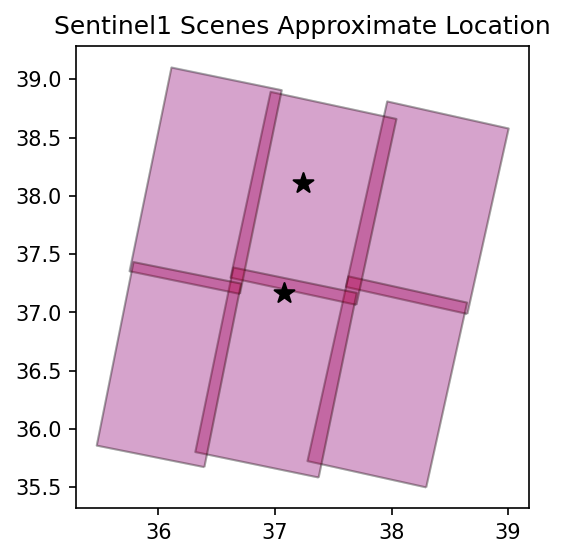

In [ ]:
plt.figure(figsize=(8,4), dpi=150)
gdf = sbas.to_dataframe()
cmap = plt.cm.get_cmap('bwr', len(gdf.index.unique()))
colors = dict([(v,cmap(k)) for k,v in enumerate(gdf.index.unique())])
gdf.reset_index().plot(color=[colors[k] for k in gdf.index], alpha=0.2, edgecolor='black', ax=plt.gca())
plt.scatter(x=sbas.get_pins()[::2], y=sbas.get_pins()[1::2], color='black', s=10)
plt.scatter(EPICENTERS[::2], EPICENTERS[1::2], marker='*', s=100, color='black')
plt.title('Sentinel1 Scenes Approximate Location', fontsize=12)
plt.show()

### Crop the Frame (Optional)

When we satisfied with the pins positions and the target frame we are ready to crop the frame.
Just comment the code cell below when you don't need to crop the area.

In [ ]:
sbas.reframe_parallel()

NOTE subswath 1: pin1 is not defined, master image corner coordinate will be used
NOTE subswath 1: pin2 is not defined, master image corner coordinate will be used
NOTE subswath 2: pin1 is not defined, master image corner coordinate will be used
NOTE subswath 2: pin2 is not defined, master image corner coordinate will be used
NOTE subswath 3: pin1 is not defined, master image corner coordinate will be used
NOTE subswath 3: pin2 is not defined, master image corner coordinate will be used


Reframing:   0%|          | 0/6 [00:00<?, ?it/s]

### Show the updated dataset (Optional)

The newly created scene frames .tiff and .xml files plus orbit files .EOF can be copied for the future processing using `SBAS.backup()` function to use them instead of the original full scenes.

In [ ]:
sbas.to_dataframe()

,datetime,orbit,mission,polarization,subswath,datapath,metapath,orbitpath,geometry
date,,,,,,,,,
2023-01-29,2023-01-29 03:34:27,D,S1A,VV,1,raw_kahr/s1a-iw1-slc-vv-20230129t033427-20230129t033517-046993-05a2fe-004.tiff,raw_kahr/s1a-iw1-slc-vv-20230129t033427-20230129t033517-046993-05a2fe-004.xml,raw_kahr/S1A_OPER_AUX_POEORB_OPOD_20230218T080751_V20230128T225942_20230130T005942.EOF,"POLYGON ((37.97066 38.81924, 37.25110 35.73090, 38.28522 35.48996, 39.00478 38.57830, 37.97066 38.81924))"
2023-01-29,2023-01-29 03:34:28,D,S1A,VV,2,raw_kahr/s1a-iw2-slc-vv-20230129t033428-20230129t033518-046993-05a2fe-005.tiff,raw_kahr/s1a-iw2-slc-vv-20230129t033428-20230129t033518-046993-05a2fe-005.xml,raw_kahr/S1A_OPER_AUX_POEORB_OPOD_20230218T080751_V20230128T225942_20230130T005942.EOF,"POLYGON ((37.37674 35.57364, 38.04189 38.66011, 36.96255 38.89271, 36.29740 35.80624, 37.37674 35.57364))"
2023-01-29,2023-01-29 03:34:27,D,S1A,VV,3,raw_kahr/s1a-iw3-slc-vv-20230129t033427-20230129t033519-046993-05a2fe-006.tiff,raw_kahr/s1a-iw3-slc-vv-20230129t033427-20230129t033519-046993-05a2fe-006.xml,raw_kahr/S1A_OPER_AUX_POEORB_OPOD_20230218T080751_V20230128T225942_20230130T005942.EOF,"POLYGON ((36.38917 35.66787, 37.05840 38.90691, 36.11312 39.10222, 35.44388 35.86318, 36.38917 35.66787))"
2023-02-10,2023-02-10 03:34:27,D,S1A,VV,1,raw_kahr/s1a-iw1-slc-vv-20230210t033427-20230210t033517-047168-05a8cd-004.tiff,raw_kahr/s1a-iw1-slc-vv-20230210t033427-20230210t033517-047168-05a8cd-004.xml,raw_kahr/S1A_OPER_AUX_POEORB_OPOD_20230302T080809_V20230209T225942_20230211T005942.EOF,"POLYGON ((37.97161 38.81873, 37.25217 35.73075, 38.28624 35.48983, 39.00568 38.57781, 37.97161 38.81873))"
2023-02-10,2023-02-10 03:34:27,D,S1A,VV,2,raw_kahr/s1a-iw2-slc-vv-20230210t033427-20230210t033517-047168-05a8cd-005.tiff,raw_kahr/s1a-iw2-slc-vv-20230210t033427-20230210t033517-047168-05a8cd-005.xml,raw_kahr/S1A_OPER_AUX_POEORB_OPOD_20230302T080809_V20230209T225942_20230211T005942.EOF,"POLYGON ((37.37782 35.57362, 38.04284 38.65961, 36.96354 38.89220, 36.29852 35.80621, 37.37782 35.57362))"
2023-02-10,2023-02-10 03:34:26,D,S1A,VV,3,raw_kahr/s1a-iw3-slc-vv-20230210t033426-20230210t033518-047168-05a8cd-006.tiff,raw_kahr/s1a-iw3-slc-vv-20230210t033426-20230210t033518-047168-05a8cd-006.xml,raw_kahr/S1A_OPER_AUX_POEORB_OPOD_20230302T080809_V20230209T225942_20230211T005942.EOF,"POLYGON ((36.39637 35.66847, 37.05832 38.90649, 36.11151 39.10005, 35.44955 35.86203, 36.39637 35.66847))"


### Download SRTM DEM

The function below downloads SRTM1 or SRTM3 DEM and converts heights to ellipsoidal model using EGM96 grid.
Besides, for faster processing we can use pre-defined DEM file as explained above.

The DEM grid is NetCDF file.

In [ ]:
sbas.download_dem(backend='GMT', resolution_meters=RESOLUTION)

DEM Downloading:   0%|          | 0/1 [00:00<?, ?it/s]

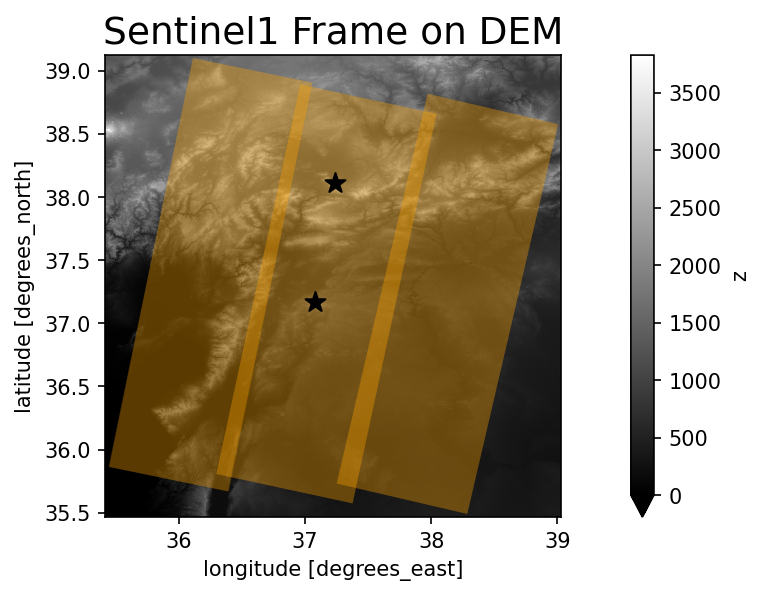

In [ ]:
plt.figure(figsize=(12,4), dpi=150)
dem = sbas.get_dem()
dem[::4,::4].plot.imshow(cmap='gray', vmin=0)
sbas.to_dataframe().plot(color='orange', alpha=0.2, ax=plt.gca())
plt.scatter(EPICENTERS[::2], EPICENTERS[1::2], marker='*', s=100, color='black')
plt.title('Sentinel1 Frame on DEM', fontsize=18)
plt.show()

## Align a Pair of Images

In [ ]:
sbas.stack_parallel()

Reference:   0%|          | 0/3 [00:00<?, ?it/s]

Aligning:   0%|          | 0/3 [00:00<?, ?it/s]

## DEM in Radar Coordinates

In [ ]:
sbas.topo_ra_parallel()

INFO:distributed.utils_perf:full garbage collection released 17.52 MiB from 6665 reference cycles (threshold: 9.54 MiB)


Radar Transform Computing sw1:   0%|          | 0/9000000.0 [00:00<?, ?it/s]

INFO:distributed.scheduler:Receive client connection: Client-worker-105fc052-8c64-11ee-a971-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:54794
INFO:distributed.scheduler:Receive client connection: Client-worker-1405245d-8c64-11ee-a96b-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:54800
INFO:distributed.scheduler:Receive client connection: Client-worker-1a75ff39-8c64-11ee-a96e-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:38094
INFO:distributed.scheduler:Receive client connection: Client-worker-1c3d69da-8c64-11ee-a968-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:43720


Radar Transform Computing sw2:   0%|          | 0/9000000.0 [00:00<?, ?it/s]

Radar Transform Computing sw3:   0%|          | 0/9000000.0 [00:00<?, ?it/s]

Analyze Transform Blocks:   0%|          | 0/40 [00:00<?, ?it/s]

Radar Topography Computing sw1:   0%|          | 0/9000000.0 [00:00<?, ?it/s]

Analyze Transform Blocks:   0%|          | 0/40 [00:00<?, ?it/s]

Radar Topography Computing sw2:   0%|          | 0/9000000.0 [00:00<?, ?it/s]

Analyze Transform Blocks:   0%|          | 0/32 [00:00<?, ?it/s]

Radar Topography Computing sw3:   0%|          | 0/9000000.0 [00:00<?, ?it/s]

### Load Grids

The grids are NetCDF files processing as xarray DataArrays.

In [ ]:
topo_ra = sbas.get_topo_ra()
# workaround
topo_ra = topo_ra if isinstance(topo_ra, list) else [topo_ra]

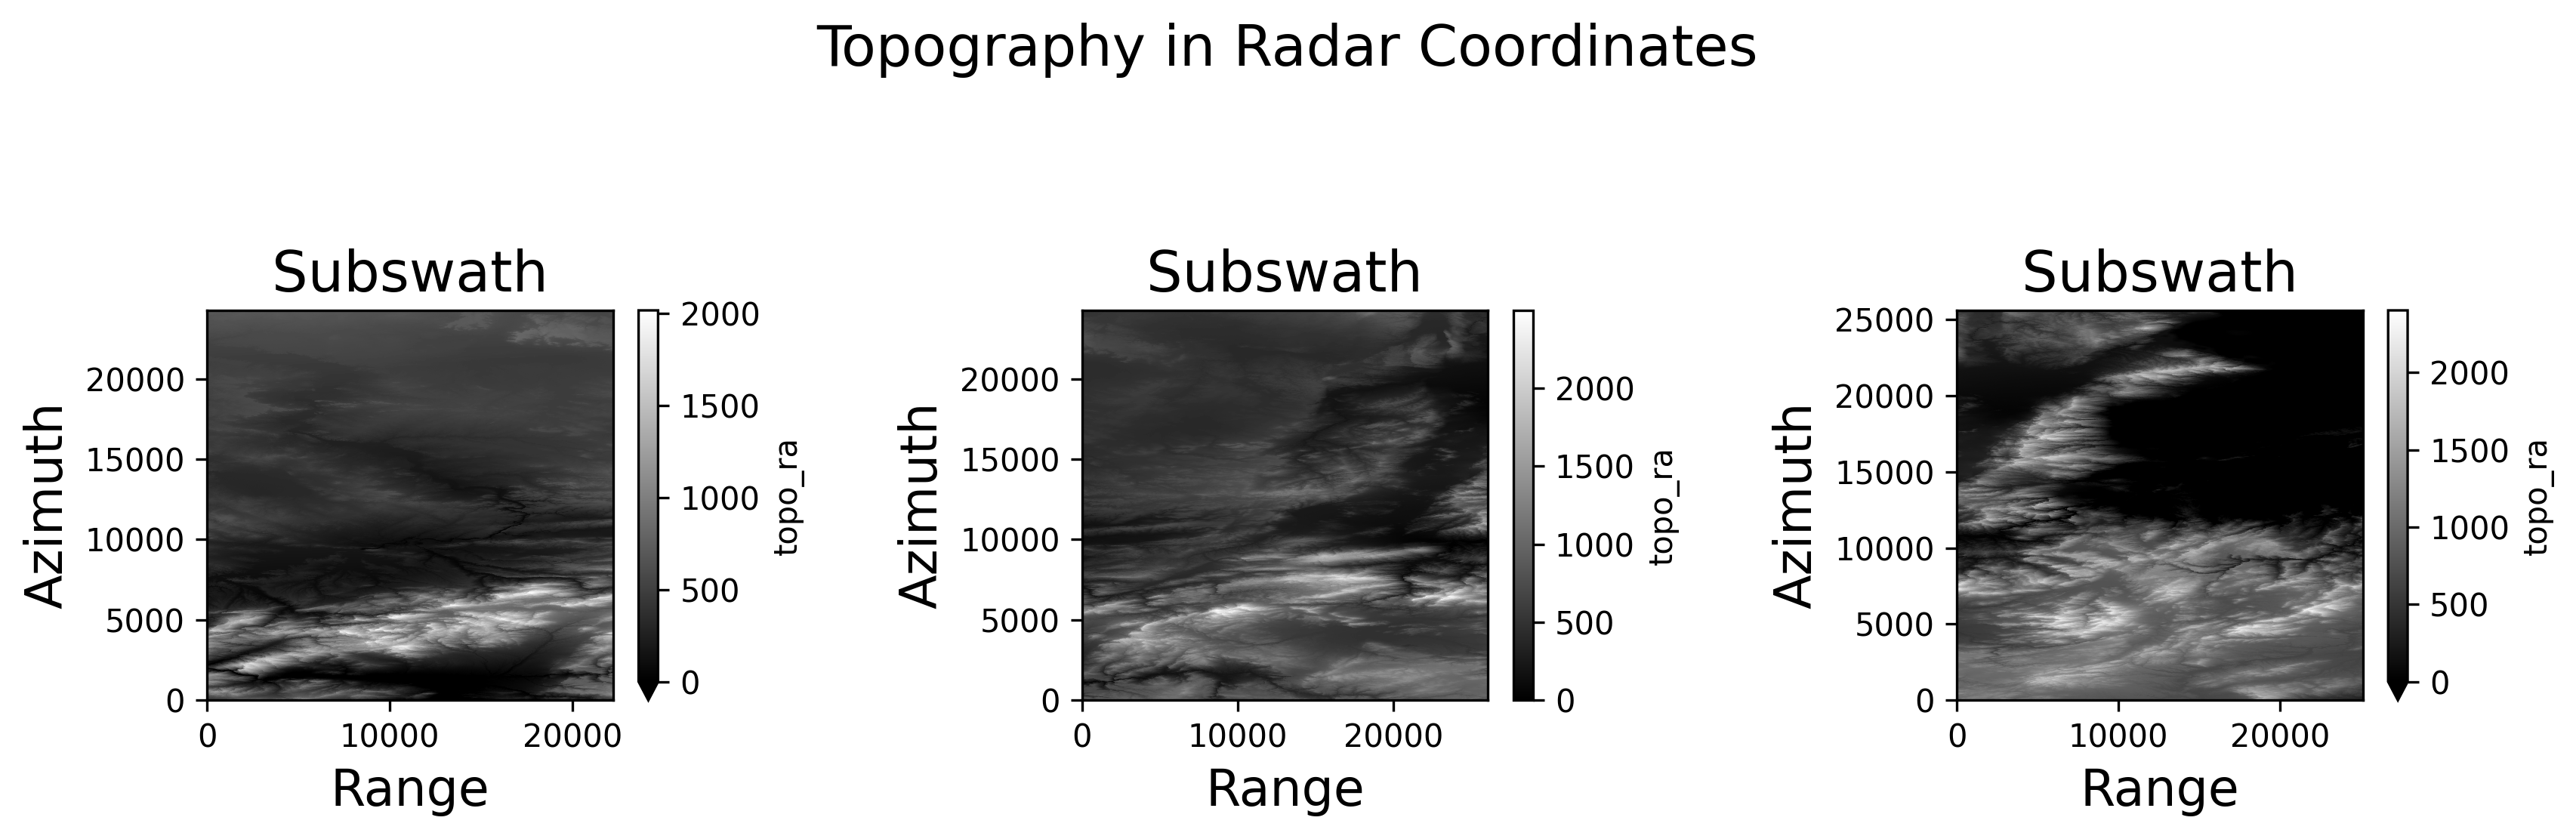

In [ ]:
fig = plt.figure(figsize=(12,4), dpi=300)

subswaths = len(topo_ra)
for subswath in range(subswaths):
    ax = fig.add_subplot(1, subswaths, subswath + 1)
    topo_ra[subswath][::4,::4].plot.imshow(cmap='gray', vmin=0, ax=ax)
    plt.xlabel('Range', fontsize=16)
    plt.ylabel('Azimuth', fontsize=16)
    plt.title('Subswath', fontsize=18)

plt.suptitle('Topography in Radar Coordinates', fontsize=18)
plt.tight_layout(pad=3)
plt.show()

## Interferogram

Define a single interferogram or a SBAS series. Make direct and reverse interferograms (from past to future or from future to past).

Decimation is useful to save disk space. Geocoding results are always produced on the provided DEM grid so the output grid and resolution are the same to the DEM. By this way, ascending and descending orbit results are always defined on the same grid by design. The internal processing cells is about 15 x 15 meters size and for default output 60m resolution (like to GMTSAR and GAMMA software) decimation 4x4 is reasonable. For the default wavelength=200 for Gaussian filter 1/4 of wavelength is approximately equal to ~60 meters and better resolution is mostly useless (while it can be used for small objects detection). For wavelength=400 meters use 90m or 120m DEM resolution with decimation 6x6 or 8x8 and for wavelength=100 meters use decimation 2x2.

The grids are NetCDF files processing as xarray DataArrays.

In [ ]:
# for a pair of scenes only two interferograms can be produced
# this one is selected for scenes sorted by the date in direct order
pairs = [sbas.to_dataframe().index.unique()]
pairs

[Index(['2023-01-29', '2023-02-10'], dtype='object', name='date')]

In [ ]:
# debug=True produces helpful information about processing resolution
decimator = sbas.pixel_decimator(resolution_meters=RESOLUTION)

# default parameters: wavelength=200, psize=32, func=None (no postprocessing)
sbas.intf_parallel(pairs, func=decimator, n_jobs=1)

Interferograms:   0%|          | 0/3 [00:00<?, ?it/s]

## Merge Subswaths (Optional)

That's the right time to merge subswath interferograms together before unwrapping them. While unwrapping is possible for separate subswath interferograms the merged interferogram unwrapping is more robust and returns better results when unconnected areas on separate subswaths are connected on the merged interferogram.

In [ ]:
sbas.merge_parallel(pairs)

In [ ]:
sbas.to_dataframe()

## Build Geocoding Matrices (Optional)

Source grid pixels can be translated to the target grid pixels very fast using the geocoding matrices.

In [ ]:
sbas.geocode_parallel(pairs)

## Calculate Epicenters in Radar Coordinates (Optional)

In [ ]:
# epicenters in radar coordinates
EPICENTERS_ra = sbas.PRM().SAT_llt2rat(np.c_[ np.reshape(EPICENTERS,(2,-1)), np.zeros(2) ] )[:,:2].reshape(-1)
EPICENTERS_ra

### Load Grids

The grids can be cropped automatically to drop empty areas around valid area (use crop_valid=True). On-the fly geocoding from radar to geographic coordinates is possible by geocode=True.

The grids are NetCDF files in radar coordinates processing as xarray DataArrays. For a single interferogramm processing convert the 3D stack to 2D grid using index [0].

In [ ]:
phasefilt_ra = sbas.open_grids(pairs, 'phasefilt')[0]
corr_ra = sbas.open_grids(pairs, 'corr')[0]

In [ ]:
phasefilt = sbas.open_grids(pairs, 'phasefilt', geocode=True, crop_valid=True)[0]
corr = sbas.open_grids(pairs, 'corr', geocode=True, crop_valid=True)[0]

In [ ]:
plt.figure(figsize=(12,4), dpi=300)
phasefilt_ra.plot.imshow(vmin=-np.pi, vmax=np.pi, cmap='gist_rainbow_r')
plt.scatter(EPICENTERS_ra[::2], EPICENTERS_ra[1::2], marker='*', s=100, color='red')
plt.title('Phase, [rad]', fontsize=18)
plt.show()

In [ ]:
plt.figure(figsize=(12,4), dpi=300)
phasefilt[::8,::8].plot.imshow(vmin=-np.pi, vmax=np.pi, cmap='gist_rainbow_r')
plt.scatter(EPICENTERS[::2], EPICENTERS[1::2], marker='*', s=100, color='red')
plt.title('Phase, [rad]', fontsize=18)
plt.show()

In [ ]:
plt.figure(figsize=(12,4), dpi=300)
corr_ra[::8,::8].plot.imshow(vmin=-0, vmax=1, cmap='gray')
plt.scatter(EPICENTERS_ra[::2], EPICENTERS_ra[1::2], marker='*', s=100, color='red')
plt.title('Correlation', fontsize=18)
plt.show()

In [ ]:
plt.figure(figsize=(12,4), dpi=300)
corr[::8,::8].plot.imshow(vmin=-0, vmax=1, cmap='gray')
plt.scatter(EPICENTERS[::2], EPICENTERS[1::2], marker='*', s=100, color='red')
plt.title('Correlation', fontsize=18)
plt.show()

## Landmask

Interferogram presents just a noise for water surfaces and unwrapping is meaningless long for these areas. Landmask allows to exclude water sufraces to produce better looking unwrapping results and much faster. Landmask in geographic coordinates is suitable to check it on the map while for unwrapping required landmask in radar coordinates.

In [ ]:
sbas.download_landmask()

### Load Grid

In [ ]:
landmask = sbas.get_landmask()

In [ ]:
plt.figure(figsize=(12,4), dpi=300)
landmask.plot.imshow(vmin=0, vmax=1, cmap='gray')
plt.scatter(EPICENTERS[::2], EPICENTERS[1::2], marker='*', s=100, color='red')
plt.title('Landmask in Geographic Coordinates', fontsize=18)
plt.show()

### Load Grid in Radar Coordinates

In [ ]:
landmask_ra = sbas.get_landmask(inverse_geocode=True)

In [ ]:
plt.figure(figsize=(12,4), dpi=300)
landmask_ra.plot.imshow(vmin=0, vmax=1, cmap='gray')
plt.scatter(EPICENTERS_ra[::2], EPICENTERS_ra[1::2], marker='*', s=100, color='red')
plt.title('Landmask in Radar Coordinates', fontsize=18)
plt.show()

### Load Grids With Landmask

The grids can be cropped automatically to drop empty areas around valid area (use crop_valid=True). On-the fly geocoding from radar to geographic coordinates is possible by geocode=True.

The grids are NetCDF files in radar coordinates processing as xarray DataArrays.  For a single interferogram processing convert the 3D stack to 2D grid using index [0].

In [ ]:
phasefilt = sbas.open_grids(pairs, 'phasefilt', mask=landmask, geocode=True)[0]

In [ ]:
plt.figure(figsize=(12,4), dpi=300)
phasefilt.plot.imshow(vmin=-np.pi, vmax=np.pi, cmap='gist_rainbow_r')
plt.scatter(EPICENTERS[::2], EPICENTERS[1::2], marker='*', s=100, color='red')
plt.title('Landmasked Phase, [rad]', fontsize=18)
plt.show()

## Unwrapping

Unwrapping process requires a lot of RAM and that's really RAM consuming when a lot of parallel proccesses running togeter. To limit the parallel processing tasks apply argument "n_jobs". The default value n_jobs=-1 means all the processor cores van be used. Also, use interferogram decimation above to produce smaller interferograms. And in addition a custom SNAPHU configuration can reduce RAM usage as explained below.

### Unwrapping Post-Processing

Define post-processing function to exclude low-coherence areas and maybe fill them by nearest neighbour interpolation.

In [ ]:
# define a post-processing function to crop low-coherence areas
#cleaner = lambda corr, unwrap: xr.where(corr>=CORRLIMIT, unwrap, np.nan)

# define a post-processing function to crop and interpolate low-coherence areas
#cleaner = lambda corr, unwrap: sbas.nearest_grid(xr.where(corr>=CORRLIMIT, unwrap, np.nan))

### Generate Custom SNAPHU Config

Default SNAPHU configuration allows to run multiple unwrapping tasks in parallel. At the same time, for a single interferogram processing or large interferograms unwrapping SNAPHU tiling can decrease the both processing time and RAM comsumption. Be careful to prevent unconnected zones on the tiles when a high coherency area is fully arounded by low-coherent buffer on some tiles (redefine tiles or increase tiles row and column overlapping parameters ROWOVRLP and COLOVRLP).

In [ ]:
# use NPROC parameter to define number of cores for the processing, by default all the cores used
# small tiles unwrapping is faster but some details can be missed
# see below the unwrapping time for 2 scenes:
# NTILEROW=4,  NTILECOL=2 - 3h
# NTILEROW=8,  NTILECOL=4 - 1h
# NTILEROW=16, NTILECOL=8 - 0.5h
conf = sbas.snaphu_config(defomax=None,
                          NTILEROW=4,
                          NTILECOL=2,
                          ROWOVRLP=200, COLOVRLP=200)

In [ ]:
# check the generated SNAPHU config and tune the SNAPHU parameters above if needed.
print ('SNAPHU custom config generated:')
print (conf)

### Interferogram Unwrapping

SNAPHU unwrapper allows to split large scene to tiles for parallel processing and accurately enough merge the tiles to a single image. That's especially helpful to unwrap a single interferogram using all the processor cores and save RAM consumption drastically.

In [ ]:
# debug output enabled to report possible processing issues
#sbas.unwrap_parallel(pairs, n_jobs=1, threshold=CORRLIMIT, func=cleaner, conf=conf, debug=True)

In [ ]:
# "FileNotFoundError" SNAPHU error means the processing is not completed normally for some tiles
# try again with different SNAPHU parameters

# run only one unwrapping task at the time because the custom SNAPHU configuration uses all the cores
sbas.unwrap_parallel(pairs, n_jobs=1, mask=landmask_ra, conf=conf)

### Load Grid

The grids can be cropped automatically to drop empty areas around valid area. Use `open_grids(..., crop_valid=True)` to enable the auto cropping feature. Argument geocode=True means on-the-fly geocoding from radar to geographic coordinates (all the grids saved on disk in radar coordinates plus geocoding matrices are generated for the fast geocoding). For a single interferogramm processing convert the 3D stack to 2D grid using index [0].

In [ ]:
unwrap = sbas.open_grids(pairs, 'unwrap', geocode=True, crop_valid=True)[0]

In [ ]:
plt.figure(figsize=(12,4), dpi=300)
zmin, zmax = np.nanquantile(unwrap, [0.01, 0.99])
unwrap.plot.imshow(vmin=zmin, vmax=zmax, cmap='jet')
plt.scatter(EPICENTERS[::2], EPICENTERS[1::2], marker='*', s=100, color='red')
plt.title('Unwrapped Phase, [rad]', fontsize=18)
plt.show()

## Detrend

In [ ]:
sbas.detrend_parallel(pairs)

## Load Grid

In [ ]:
unwraps_detrend = sbas.open_grids(pairs, 'detrend', geocode=True, crop_valid=True)[0]

In [ ]:
plt.figure(figsize=(12,4), dpi=300)
zmin, zmax = np.nanquantile(unwraps_detrend, [0.01, 0.99])
unwraps_detrend.plot.imshow(vmin=zmin, vmax=zmax, cmap='jet')
plt.scatter(EPICENTERS[::2], EPICENTERS[1::2], marker='*', s=100, color='red')
plt.title('Detrended Unwrapped Phase, [rad]', fontsize=18)
plt.show()

## LOS Displacement

### Load and Calculate Grid

The grids can be post-processed using user-defined function "func". SBAS function `los_displacement_mm()` converts unwrapped phase values to LOS displacement in millimeters. For a single interferogramm processing convert the 3D stack to 2D grid using index [0].

In [ ]:
los_disp_mm = sbas.open_grids(pairs, 'unwrap', func=sbas.los_displacement_mm, geocode=True, crop_valid=True)[0]

In [ ]:
los_disp_detrend_mm = sbas.open_grids(pairs, 'detrend', func=sbas.los_displacement_mm, geocode=True, crop_valid=True)[0]

In [ ]:
plt.figure(figsize=(12,4), dpi=300)
zmin, zmax = np.nanquantile(los_disp_mm, [0.01, 0.99])
los_disp_mm.plot.imshow(vmin=zmin, vmax=zmax, cmap='jet')
plt.scatter(EPICENTERS[::2], EPICENTERS[1::2], marker='*', s=100, color='red')
plt.title('LOS Displacement, [mm]', fontsize=18)
plt.show()

In [ ]:
plt.figure(figsize=(12,4), dpi=300)
zmin, zmax = np.nanquantile(los_disp_detrend_mm, [0.01, 0.99])
los_disp_detrend_mm.plot.imshow(vmin=zmin, vmax=zmax, cmap='jet')
plt.scatter(EPICENTERS[::2], EPICENTERS[1::2], marker='*', s=100, color='red')
plt.title('Detrended LOS Displacement, [mm]', fontsize=18)
plt.show()

## Vertical and East-West Displacements Projections

LOS displacement projections as vertical and east-west displacements can be calculated using incidence angle defined on the grid.

In [ ]:
sbas.sat_look_parallel()

In [ ]:
incidence_angle = sbas.incidence_angle()

In [ ]:
plt.figure(figsize=(12,4), dpi=300)
incidence_angle.plot.imshow(cmap='gray')
plt.title('Incidence Angle, [rad]', fontsize=18)
plt.show()

### Load and Calculate Grid

The grids can be post-processed using user-defined function "func". SBAS functions `vertical_displacement_mm()` and `eastwest_displacement_mm()` convert unwrapped phase values to vertical and East-West displacements in millimeters. For a single interferogramm processing convert the 3D stack to 2D grid using index [0].

In [ ]:
vert_disp_mm = sbas.open_grids(pairs, 'unwrap', func=sbas.vertical_displacement_mm, geocode=True, crop_valid=True)[0]
east_disp_mm = sbas.open_grids(pairs, 'unwrap', func=sbas.eastwest_displacement_mm, geocode=True, crop_valid=True)[0]

In [ ]:
plt.figure(figsize=(12,4), dpi=300)
zmin, zmax = np.nanquantile(vert_disp_mm, [0.01, 0.99])
vert_disp_mm.plot.imshow(vmin=zmin, vmax=zmax, cmap='jet')
plt.scatter(EPICENTERS[::2], EPICENTERS[1::2], marker='*', s=100, color='red')
plt.title('Vertical Projection LOS Displacement, [mm]', fontsize=18)
plt.show()

In [ ]:
plt.figure(figsize=(12,4), dpi=300)
zmin, zmax = np.nanquantile(east_disp_mm, [0.01, 0.99])
east_disp_mm.plot.imshow(vmin=zmin, vmax=zmax, cmap='jet')
plt.scatter(EPICENTERS[::2], EPICENTERS[1::2], marker='*', s=100, color='red')
plt.title('East-West Projection LOS Displacement, [mm]', fontsize=18)
plt.show()

## Save Geographic Coordinates NetCDF Grids

In [ ]:
filename = f'{WORKDIR}.corr.nc'
# drop the existing file first
!rm -fr {filename}
# apply landmask before and geocode later
landmask_ra = sbas.get_landmask(inverse_geocode=True)
corr = sbas.open_grids(pairs, 'corr', mask=landmask_ra, geocode=True, crop_valid=True)[0]
delayed = corr.to_netcdf(filename, engine=sbas.engine, compute=False)
tqdm_dask(dask.persist(delayed), desc='Saving NetCDF')

In [ ]:
filename = f'{WORKDIR}.phasefilt.nc'
# drop the existing file first
!rm -fr {filename}
# apply landmask before and geocode later
landmask_ra = sbas.get_landmask(inverse_geocode=True)
phasefilt = sbas.open_grids(pairs, 'phasefilt', mask=landmask_ra, geocode=True, crop_valid=True)[0]
delayed = phasefilt.to_netcdf(filename, engine=sbas.engine, compute=False)
tqdm_dask(dask.persist(delayed), desc='Saving NetCDF')

In [ ]:
filename = f'{WORKDIR}.los_disp_detrend_mm.nc'
# drop the existing file first
!rm -fr {filename}
# landmask already applied to unwrapped phase
los_disp_detrend_mm = sbas.open_grids(pairs, 'detrend', func=sbas.los_displacement_mm, geocode=True, crop_valid=True)[0]
delayed = los_disp_detrend_mm.to_netcdf(filename, engine=sbas.engine, compute=False)
tqdm_dask(dask.persist(delayed), desc='Saving NetCDF')

## Download Geographic Coordinates NetCDF Grids from Google Colab

In [ ]:
if 'google.colab' in sys.modules:
    from google.colab import files
    files.download(f'{WORKDIR}.phasefilt.nc')
    files.download(f'{WORKDIR}.corr.nc')
    files.download(f'{WORKDIR}.los_disp_detrend_mm.nc')